# IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis

**Kaggle dataset page:** [IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

### The IMDB Dataset of 50K Movie Reviews is a popular dataset available on Kaggle that consists of a collection of 50,000 movie reviews sourced from the Internet Movie Database (IMDB).
## Dataset Features and Details:

**Size:** 
- The dataset contains 50,000 reviews, evenly split into 25,000 positive and 25,00 negative reviews.

**Format:** 
- The dataset is structured as a CSV file (comma-separated values) and includes two main columns:
    - **"review" column:** Contains the text of the movie reviews.
    - **"sentiment" column:** Indicates the sentiment polarity of the reviews, where positive sentiments are labeled as 'positive' and negative sentiments as 'negative'.

## Import require libralies

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load file to the dataframe

In [2]:
filePath = "IMDB Dataset.csv"
df_IMDB = pd.read_csv(filePath)

## Exploratory Data Analysis (EDA)

In [3]:
df_IMDB.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Getting information about the DataFrame
df_IMDB.info()
print(f"\n Null value:\n {df_IMDB.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

 Null value:
 review       0
sentiment    0
dtype: int64


In [5]:
# summary of dataset
df_IMDB.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


###### The dataset contains redundant or repeated reviews.

In [6]:
duplicates = df_IMDB.review.duplicated()
print(f"Number of duplicates : {duplicates.sum()}")
print("\nInspect a sample that is duplicated.:")
duplicate_review = df_IMDB[duplicates].review.iloc[0]
print(df_IMDB[df_IMDB["review"] == duplicate_review])

Number of duplicates : 418

Inspect a sample that is duplicated.:
                                                 review sentiment
2013  Quite what the producers of this appalling ada...  negative
3537  Quite what the producers of this appalling ada...  negative


In [7]:
# Remove duplicates based on specific columns
df = df_IMDB.drop_duplicates(subset=['review'])

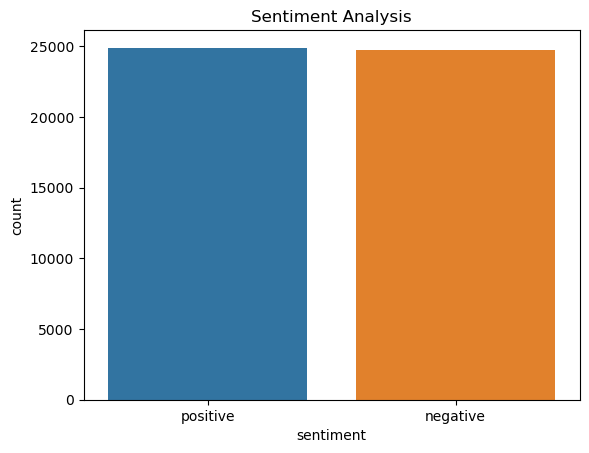

In [8]:
sns.countplot(x = 'sentiment', data = df)
plt.title("Sentiment Analysis")
plt.show()

##### The dataset exhibits a well-balanced distribution between positive and negative sentiments.

## Examine and analyze five specific reviews for detailed observations

In [9]:
for index, row in df_IMDB.head().iterrows():
        print(f"\033[1m\033[94mReview {index+1}: {row['sentiment']} sentiment\033[0m")
        print(f"{row['review']}\n")

Review 1: positive sentiment
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal 

## Machine Learning Models:

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Download NLTK resources
nltk.download('punkt', quiet=True);
nltk.download('stopwords', quiet=True);
nltk.download('wordnet', quiet=True);
nltk.download('omw-1.4', quiet=True);

In [11]:
# Preprocess the text data
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    # replace the html break
    text = text.replace('<br />', '')
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [12]:
review1 = df_IMDB.iloc[0,0]
print(f"\033[1m\033[94mRaw text:\033[0m\n {review1}")
print(f"\n\033[1m\033[94mPreporcessed text:\033[0m\n {preprocess_text(review1)}")

Raw text:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

In [13]:
df['review'] = df['review'].apply(preprocess_text)

## Feature extraction

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

In [15]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["review"])
y = df["sentiment"]

## Split the data

In [16]:
# Split the dataset into training and testing sets
# sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)[source]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Train the models

In [17]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### Support Vector Machines (SVM)

In [18]:
# Train a Support Vector Machine (SVM) classifier
svm = SVC(kernel ='rbf', random_state = 0)
svm.fit(X_train, y_train)

SVC(random_state=0)

### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train.toarray(), y_train)

MultinomialNB()

### Logistic Regression

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [22]:
models = {'SVM': svm, 'Decision Tree': dec_tree, 'Naive Bayes': mnb, 'Logistic Regression': log_reg}
scores = []
for key, value in models.items():
    scores.append(value.score(X_test, y_test))

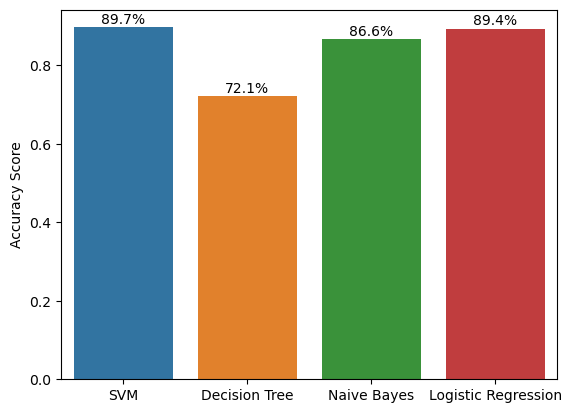

In [23]:
ax = sns.barplot(x = list(models.keys()), y = scores)
for i, v in enumerate(scores):
    ax.text(i, v + 0.01, f'{v:.1%}', ha='center')
ax.set_ylabel("Accuracy Score")
plt.show()

#### Apart from the underperforming Decision Tree, both SVM and logistic regression demonstrate nearly equal and strong performance, achieving approximately 90% accuracy on test set.

### Evaluate the model

In [24]:
# Make predictions
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy*100:.1f}%")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Set Accuracy: 89.7%

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4955
    positive       0.89      0.91      0.90      4962

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



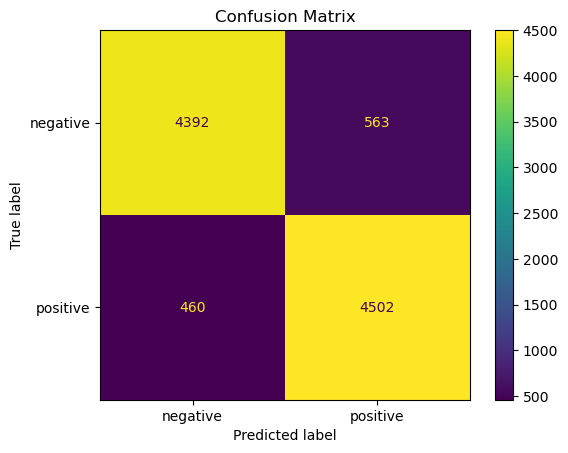

In [25]:
cm = confusion_matrix(y_test, y_pred)
class_labels = set(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

## Limiatation
- While TF-IDF aims to highlight words with higher potential to convey crucial and precise information within a document, it operates by treating individual words in isolation, without factoring in the interconnections or semantic relationships between them.

## Insight for improvement
- Word2Vec embeddings, capturing word meanings and relationships, can outperform TF-IDF in tasks requiring understanding context and semantics, such as language translation or sentiment analysis. However, the effectiveness depends on the specific task and dataset. Experimentation is key to determine which method suits the task best.
- Consider Hyper parameter tuning, Random Forests, Gradient Boosting Machines, RNNs, CNNs, Transformer-based models (like BERT or GPT), improved SVM with kernel tricks, or Ensemble Methods to enhance accuracy and manage intricate textual relationships when conducting sentiment analysis on movie reviews.
- However, it's important to note that sentiment analysis might not always capture the complete sentiment accurately due to nuances, sarcasm, or context within the text, and thus, manual validation or human oversight is sometimes necessary for precise analysis, especially in the case of complex opinions expressed in movie reviews.